In [1]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [4]:
llm.invoke("hello")

AIMessage(content='Hello there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--e52f6469-aab4-4dd6-ab23-9d00df604d30-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [5]:
class JokeState(TypedDict):
    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {"joke": response}

In [ ]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {"explanation": response}

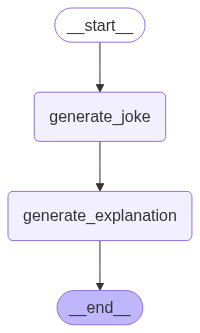

In [ ]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

workflow

In [ ]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({"topic": "pizza"}, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza maker quit his job? \n\nHe said he was tired of getting dough!',
 'explanation': 'The joke plays on the double meaning of the word "dough."\n\n*   **Literal meaning:** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. Pizza makers handle dough all day as part of their job.\n*   **Figurative meaning (slang):** "Dough" is also a slang term for money.\n\nThe humor comes from the pizza maker saying he\'s tired of handling pizza dough (literal), but the audience immediately understands that he\'s also implying he\'s tired of not making enough money (figurative). It\'s a pun, using one word to create two different, but related, meanings. The unexpected second meaning is what makes the joke funny.'}

In [10]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker quit his job? \n\nHe said he was tired of getting dough!', 'explanation': 'The joke plays on the double meaning of the word "dough."\n\n*   **Literal meaning:** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. Pizza makers handle dough all day as part of their job.\n*   **Figurative meaning (slang):** "Dough" is also a slang term for money.\n\nThe humor comes from the pizza maker saying he\'s tired of handling pizza dough (literal), but the audience immediately understands that he\'s also implying he\'s tired of not making enough money (figurative). It\'s a pun, using one word to create two different, but related, meanings. The unexpected second meaning is what makes the joke funny.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f077a8c-68fd-6153-8002-114e9ac7a5ba'}}, metadata={'source': 'loop', 'step': 2

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker quit his job? \n\nHe said he was tired of getting dough!', 'explanation': 'The joke plays on the double meaning of the word "dough."\n\n*   **Literal meaning:** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. Pizza makers handle dough all day as part of their job.\n*   **Figurative meaning (slang):** "Dough" is also a slang term for money.\n\nThe humor comes from the pizza maker saying he\'s tired of handling pizza dough (literal), but the audience immediately understands that he\'s also implying he\'s tired of not making enough money (figurative). It\'s a pun, using one word to create two different, but related, meanings. The unexpected second meaning is what makes the joke funny.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f077a8c-68fd-6153-8002-114e9ac7a5ba'}}, metadata={'source': 'loop', 'step': 

In [ ]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({"topic": "pasta"}, config=config2)

{'topic': 'pasta',
 'joke': "Why did the spaghetti break up with the meatball?\n\nBecause he was too clingy! He just wouldn't let her get past-a him!",
 'explanation': 'Okay, let\'s break down the spaghetti breakup joke:\n\n*   **The Setup:** The joke sets up a scenario where spaghetti and a meatball are in a relationship, which is already a bit humorous because they are food items.\n\n*   **The Punchline - "Because he was too clingy!"** This is the first layer of humor. Meatballs are often served *on top* of spaghetti. So the joke personifies this as the meatball being overly attached to the spaghetti.\n\n*   **The Second Punchline - "He just wouldn\'t let her get past-a him!"** This is where the wordplay and deeper humor come in. It\'s a pun playing on the word "past" and "pasta" (spaghetti is a type of pasta). The meatball, being "clingy," is literally blocking the spaghetti from moving forward or moving *past* him. The pun reinforces the idea that he\'s not letting her move on in t

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the spaghetti break up with the meatball?\n\nBecause he was too clingy! He just wouldn't let her get past-a him!", 'explanation': 'Okay, let\'s break down the spaghetti breakup joke:\n\n*   **The Setup:** The joke sets up a scenario where spaghetti and a meatball are in a relationship, which is already a bit humorous because they are food items.\n\n*   **The Punchline - "Because he was too clingy!"** This is the first layer of humor. Meatballs are often served *on top* of spaghetti. So the joke personifies this as the meatball being overly attached to the spaghetti.\n\n*   **The Second Punchline - "He just wouldn\'t let her get past-a him!"** This is where the wordplay and deeper humor come in. It\'s a pun playing on the word "past" and "pasta" (spaghetti is a type of pasta). The meatball, being "clingy," is literally blocking the spaghetti from moving forward or moving *past* him. The pun reinforces the idea that he\'s not letti

In [ ]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the spaghetti break up with the meatball?\n\nBecause he was too clingy! He just wouldn't let her get past-a him!", 'explanation': 'Okay, let\'s break down the spaghetti breakup joke:\n\n*   **The Setup:** The joke sets up a scenario where spaghetti and a meatball are in a relationship, which is already a bit humorous because they are food items.\n\n*   **The Punchline - "Because he was too clingy!"** This is the first layer of humor. Meatballs are often served *on top* of spaghetti. So the joke personifies this as the meatball being overly attached to the spaghetti.\n\n*   **The Second Punchline - "He just wouldn\'t let her get past-a him!"** This is where the wordplay and deeper humor come in. It\'s a pun playing on the word "past" and "pasta" (spaghetti is a type of pasta). The meatball, being "clingy," is literally blocking the spaghetti from moving forward or moving *past* him. The pun reinforces the idea that he\'s not lett

## Fault Tolerance


In [15]:
import time

In [16]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [ ]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}


def step_2(state: CrashState) -> CrashState:
    print(
        "⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)"
    )
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}


def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [18]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": "thread-1"}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": "thread-1"}})
print("\n✅ Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": "thread-1"}}))